In [2]:
import warnings
from matplotlib import MatplotlibDeprecationWarning
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=LinAlgWarning)
warnings.filterwarnings(action='ignore', category=MatplotlibDeprecationWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-06-09 23:19:05.761455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 23:19:05.761482: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

# Transfer learning

<br>

<img src="Grafika/transfer_learning.png" width="550">

**Transfer learning** (transfer "wiedzy") - wykorzystanie nauczonych przez kogoś sieci do naszego problemu. Możliwe dzięki temu, że cechy wykrywane przez sieci w głębokich warstwach mogą być uniwersalne i przydatne w różnych problemach.

### VGG16

In [8]:
from keras.applications import VGG16, InceptionV3
base_model = VGG16(weights='imagenet',include_top=False)
base_model.summary()

2022-06-09 23:20:35.859340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 23:20:35.859633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 23:20:35.859694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-09 23:20:35.859747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-09 23:20:35.859797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### InceptionV3

In [9]:
inc = InceptionV3()
inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

# Zad
Trzeba nadać wymiar wejści anaszej sieci
```python
h,w = 150, 150
```

In [10]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [12]:
len(model.layers)

19

# Zad 
Zbudujmy siec z 
* VGG16 dla wejścia h,w = 150, 150
* Flatten
* Dense
* Dense

In [13]:
h,w = 150, 150
model = VGG16(weights='imagenet',include_top=False,input_shape=(h,w,3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 1)                 2097665   
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.summary()
top_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Zad
Naucz model 
 
* użyj Image Augmentation

In [23]:
from keras.preprocessing.image import ImageDataGenerator

model_transfer.compile(loss='binary_crossentropy',optimizer="sgd",metrics=['accuracy'])

train_data_dir = r'./data/data/train'
validation_data_dir = r'./data/data/validation'
nb_validation_samples = 200
nb_train_samples = 50
epochs = 50
batch_size = 10

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=45, 
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w), 
                                                        batch_size=batch_size,
                                                        class_mode='binary')


Found 200 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [24]:
nb_validation_samples//batch_size

20

In [32]:
history_tr_ag = History()
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model_transfer.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, 
                    validation_data=validation_generator, validation_steps=10, callbacks=[early_stopping, history_tr_ag])

Epoch 1/50
10/10 [==============================] - 5s 472ms/step - loss: 0.2074 - accuracy: 0.8900
Epoch 2/50
10/10 [==============================] - 5s 470ms/step - loss: 0.2424 - accuracy: 0.9000
Epoch 3/50
10/10 [==============================] - 5s 469ms/step - loss: 0.3736 - accuracy: 0.8200
Epoch 4/50
10/10 [==============================] - 5s 470ms/step - loss: 0.1606 - accuracy: 0.9300
Epoch 5/50
10/10 [==============================] - 5s 466ms/step - loss: 0.1886 - accuracy: 0.9100
Epoch 6/50
10/10 [==============================] - 5s 465ms/step - loss: 0.3090 - accuracy: 0.8400
Epoch 7/50
10/10 [==============================] - 5s 465ms/step - loss: 0.1997 - accuracy: 0.9200
Epoch 8/50
10/10 [==============================] - 5s 467ms/step - loss: 0.3136 - accuracy: 0.8500
Epoch 9/50
10/10 [==============================] - 5s 466ms/step - loss: 0.2106 - accuracy: 0.9400
Epoch 10/50
10/10 [==============================] - 5s 465ms/step - loss: 0.2830 - accuracy: 0.8700

10/10 [==============================] - 5s 470ms/step - loss: 0.1947 - accuracy: 0.9300
Epoch 28/50
10/10 [==============================] - 5s 474ms/step - loss: 0.2316 - accuracy: 0.9300
Epoch 29/50
10/10 [==============================] - 5s 467ms/step - loss: 0.1839 - accuracy: 0.9200
Epoch 30/50
10/10 [==============================] - 5s 469ms/step - loss: 0.1618 - accuracy: 0.9400
Epoch 31/50
10/10 [==============================] - 5s 469ms/step - loss: 0.1144 - accuracy: 0.9500
Epoch 32/50
10/10 [==============================] - 5s 469ms/step - loss: 0.1472 - accuracy: 0.9500
Epoch 33/50
10/10 [==============================] - 5s 466ms/step - loss: 0.3517 - accuracy: 0.8500
Epoch 34/50
10/10 [==============================] - 5s 468ms/step - loss: 0.1380 - accuracy: 0.9500
Epoch 35/50
10/10 [==============================] - 5s 466ms/step - loss: 0.1744 - accuracy: 0.9200
Epoch 36/50
10/10 [==============================] - 5s 469ms/step - loss: 0.1812 - accuracy: 0.9300
Ep

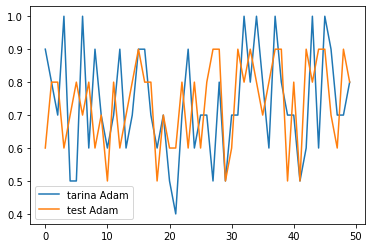

In [19]:
# DON'T TOUCH!! WILL RUIN DIAGRAM IF EXECUTED!!

In [ ]:
plt.plot(history_tr_ag.history['accuracy'], label = "tarina Adam")
plt.plot(history_tr_ag.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad
Wykonaj zadania na większym zbiorze danych.

https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [22]:
from keras.preprocessing.image import ImageDataGenerator

model_transfer.compile(loss='binary_crossentropy',optimizer="sgd",metrics=['accuracy'])

train_data_dir = './data/PetImages'
validation_data_dir = './data/data/validation'
nb_validation_samples = 200
nb_train_samples = 50
epochs = 50
batch_size = 10

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=45, 
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w), 
                                                        batch_size=batch_size,
                                                        class_mode='binary')

history_tr_ag2 = History()
early_stopping = EarlyStopping(patience=3,monitor="val_loss,val_accuracy")
model_transfer.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, 
                    validation_data=validation_generator, validation_steps=10, callbacks=[early_stopping, history_tr_ag2])

Found 24990 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/50
10/10 [==============================] - 5s 474ms/step - loss: 0.4412 - accuracy: 0.7900
Epoch 2/50
10/10 [==============================] - 5s 482ms/step - loss: 0.2834 - accuracy: 0.8600
Epoch 3/50
10/10 [==============================] - 5s 477ms/step - loss: 0.3877 - accuracy: 0.8300
Epoch 4/50
10/10 [==============================] - 5s 479ms/step - loss: 0.4382 - accuracy: 0.7900
Epoch 5/50
10/10 [==============================] - 5s 477ms/step - loss: 0.4165 - accuracy: 0.7700
Epoch 6/50
10/10 [==============================] - 5s 479ms/step - loss: 0.3111 - accuracy: 0.9000
Epoch 7/50
10/10 [==============================] - 5s 478ms/step - loss: 0.4313 - accuracy: 0.8500
Epoch 8/50
10/10 [==============================] - 5s 479ms/step - loss: 0.4249 - accuracy: 0.8200
Epoch 9/50
10/10 [==============================] - 5s 481ms/step - loss: 0.4751 - accuracy: 0.7700
Epoch 10/50
10/10

10/10 [==============================] - 5s 482ms/step - loss: 0.4697 - accuracy: 0.7500
Epoch 27/50
10/10 [==============================] - 5s 481ms/step - loss: 0.3587 - accuracy: 0.8000
Epoch 28/50
10/10 [==============================] - 5s 481ms/step - loss: 0.3902 - accuracy: 0.7900
Epoch 29/50
10/10 [==============================] - 5s 483ms/step - loss: 0.3844 - accuracy: 0.8200
Epoch 30/50
10/10 [==============================] - 5s 480ms/step - loss: 0.3772 - accuracy: 0.8400
Epoch 31/50
10/10 [==============================] - 5s 480ms/step - loss: 0.4554 - accuracy: 0.8200
Epoch 32/50
10/10 [==============================] - 5s 479ms/step - loss: 0.3693 - accuracy: 0.8200
Epoch 33/50
10/10 [==============================] - 5s 480ms/step - loss: 0.3816 - accuracy: 0.8400
Epoch 34/50
10/10 [==============================] - 5s 478ms/step - loss: 0.4571 - accuracy: 0.8200
Epoch 35/50
10/10 [==============================] - 5s 481ms/step - loss: 0.4989 - accuracy: 0.7500
Ep

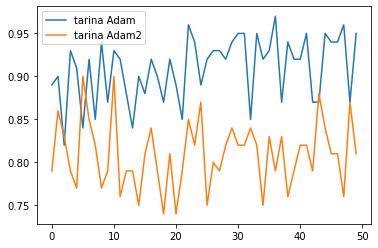

In [35]:
plt.plot(history_tr_ag.history['accuracy'], label = "tarina Adam")
#plt.plot(history_tr_ag.history['val_accuracy'], label = "test Adam")
plt.plot(history_tr_ag2.history['accuracy'], label = "tarina Adam2")
#plt.plot(history_tr_ag2.history['val_accuracy'], label = "test Adam2")

plt.legend()
plt.show()